# Problem Statement
- Based on the emails received, build multiple models and chose best model to predict the new email is spam or normal email.

# Necessary process to follow
Read dataset and make it in proper format.

Encode labels

Convert all cases to lower

Remove punctuations

Remove Stopwords

Check stats of messages

convert all text into vectors

Import classifier

Train and Test

Check the accuracy/confusion matrix

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
email=pd.read_csv('email_spam_messages.csv')
email.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


Top 5 head of the Dataset

# Exploratory data analysis

In [3]:
# checking shape
email.shape

(2893, 3)

2893 rows and 3 columns in the dataset.

In [4]:
# checking null values
email.isnull().sum()

subject    62
message     0
label       0
dtype: int64

We have 62 null values in subject column

In [20]:
# dropping Nan rows
email.dropna(inplace=True)
email.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,4492


Now Nan values has been dropped.

In [21]:
# checking counts of ham emails and spam emails in label columns
print("ham emails and spam emails","\n",email.label.value_counts())

ham emails and spam emails 
 0    2363
1     468
Name: label, dtype: int64


In [22]:
# new columns for the length of messages
email['length']=email.message.str.len()
email.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,4492


Now we can see one column 'length' has been added in the datset and giving length of the messages.

In [27]:
# converting all messages to lower case
email['message']=email['message'].str.lower()


In [28]:
# converting subject column to lower case
email['subject']=email['subject'].str.lower()

In [29]:
 # Replace email addresses with 'email'
email['message']=email['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

email['subject']=email['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [31]:
# Replace URLs with 'webaddress'
# Replace money symbols with 'moneysymb'(£ can be typed with ALT + 156# Replace money symbols with 'moneysymb'(£ can be typed with ALT + 156
email['message']=email['message'].str.replace(r'^http\://a[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                            'webaddress')

email['subject']=email['subject'].str.replace(r'^http\://a[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [32]:
 # Replace money symbols with 'moneysymb'(£ can be typed with ALT + 156
email['message']=email['message'].str.replace(r'£|\$','dollers')

email['subject']=email['subject'].str.replace(r'£|\$','dollers')
    

In [33]:
# Replace 10 didgit phone numbers(formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
email['message']=email['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{d}','phonenumber')

email['subject']=email['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{d}','phonenumber')

In [34]:
# replace numbers with 'numbr'
email['message']=email['message'].str.replace(r'\d+(\.\d+)?','numbr')

email['subject']=email['subject'].str.replace(r'\d+(\.\d+)?','numbr')

In [35]:
# remove punctuation
email['message']=email['message'].str.replace(r'[^\w\d\s]',' ')

email['subject']=email['subject'].str.replace(r'[^\w\d\s]',' ')


# Replace whitespace between terms with a single space
email['message']=email['message'].str.replace(r'\s+',' ')

email['subject']=email['subject'].str.replace(r'\s+',' ')

# Remove Leading and trailing whitespace
email['message']=email['message'].str.replace(r'^\s+|\s+?$',' ')

email['subject']=email['subject'].str.replace(r'^\s+|\s+?$',' ')

# Removing stopwords

In [36]:
import string
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english')+['u','ur','4','2','im','dont','doin','ure'])

email['meesage']=email['message'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

email['subject']=email['subject'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [37]:
# New column (clean_length) after punctuations, stop words removal
email['clean_length']=email.message.str.len()
email.head()

,subject,message,label,length,meesage,clean_length
0,job posting apple iss research center,content length numbr apple iss research center...,0,2856,content length numbr apple iss research center...,2560
2,query letter frequencies text identification,i am posting this inquiry for sergei atamas sa...,0,1435,posting inquiry sergei atamas satamas umabnet ...,1357
3,risk,a colleague and i are researching the differin...,0,324,colleague researching differing degrees risk p...,316
4,request book information,earlier this morning i was on the phone with a...,0,1046,earlier morning phone friend mine living south...,956
5,call abstracts optimality syntactic theory,content length numbr call for papers is the be...,0,4492,content length numbr call papers best good eno...,4130


In [39]:
email.shape

(2831, 6)

In [40]:
# Total Length removal
print('original length',email.length.sum())
print('clean length',email.clean_length.sum())

original length 9186422
clean length 8432920


In [42]:
!pip install wordcloud

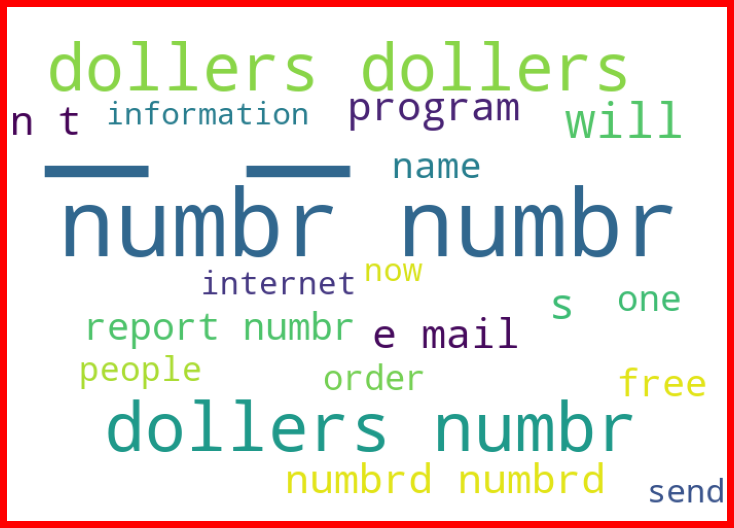

In [44]:
# Getting sense of Loud words in spam

from wordcloud import WordCloud

spams=email['message'][email['label']==1]

spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see these word are indication of spams.

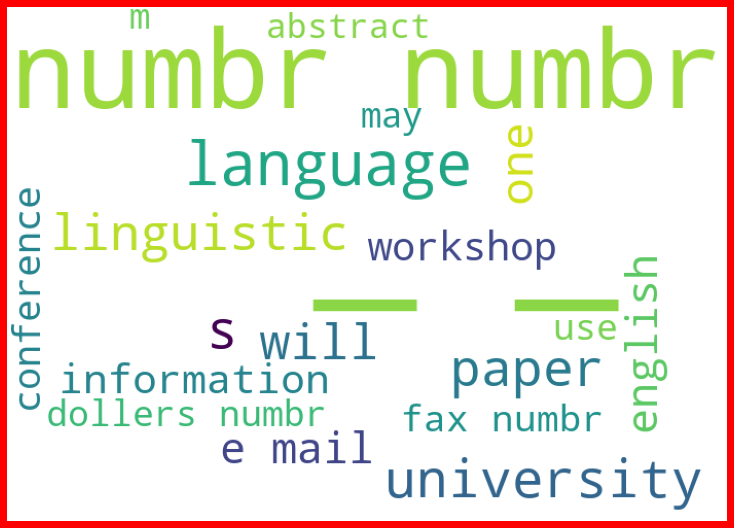

In [45]:
# getting sense of Loud words in ham

hams=email['message'][email['label']==0]

ham_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

we can see these are the normal message text.

# Model Building

In [52]:
# 1. convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec=TfidfVectorizer()

mnb=MultinomialNB()

features=tf_vec.fit_transform(email['message'])

x=features
y=email['label']

In [54]:
# train and Predict
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=43)


# prediction
mnb.fit(x_train,y_train)
pred_y=mnb.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred_y))
print('confusion matrix',confusion_matrix(y_test,pred_y))
print('classification',classification_report(y_test,pred_y))

accuracy score 0.847457627118644
confusion matrix [[595   0]
 [108   5]]
classification               precision    recall  f1-score   support

           0       0.85      1.00      0.92       595
           1       1.00      0.04      0.08       113

    accuracy                           0.85       708
   macro avg       0.92      0.52      0.50       708
weighted avg       0.87      0.85      0.78       708



In [55]:
# cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(mnb,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.8396333065355444


So we are getting approx 84% accuracy score and cross validation score.